In [1]:
from bs4 import BeautifulSoup
from pprint import pprint
from urllib import request
from nltk import sent_tokenize
import nltk.data
from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
import nltk
import json
import time
import sys
import re
import numpy
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math

nltk.data.path.append('D:/WS/MSc/TMP/nltk_data')

RESOURCES_PATH_LINKS = 'Resources/Corpora/EU/Links/'
RESOURCES_PATH_POSTS = 'Resources/Corpora/EU/Posts/'
RESOURCES_COMPLETE_CORPORA_FILENAME = 'complete_wow_class_posts_dict'


class WowClassesResources:

    def __init__(self):
        None

    WOW_FORUM_ROOT_URL_EU = 'http://eu.battle.net'
    WOW_FORUM_ROOT_URL_US = 'http://us.battle.net'
    WOW_FORUM_MID_URL = '/forums/en/wow/'
    URL_PAGE_ATTRIBUTE = "?page="

    WOW_CLASS_LIST_EU = [('Death Knight', "874789/"),
                      ('Demon Hunter', "19369494/"),
                      ('Druid', "874790/"),
                      ('Hunter', "874791/"),
                      ('Mage', "874792/"),
                      ('Monk', "6038099/"),
                      ('Paladin', "874793/"),
                      ('Priest', "874794/"),
                      ('Rogue', "874795/"),
                      ('Shaman', "874796/"),
                      ('Warlock', "874929/"),
                      ('Warrior', "874930/")]
    WOW_CLASS_LIST_US = [('Death Knight', "1012662/"),
                      ('Demon Hunter', "22813967/"),
                      ('Druid', "1012663/"),
                      ('Hunter', "1012664/"),
                      ('Mage', "1012760/"),
                      ('Monk', "7379141/"),
                      ('Paladin', "1012668/"),
                      ('Priest', "1012666/"),
                      ('Rogue', "1012667/"),
                      ('Shaman', "1012669/"),
                      ('Warlock', "1012670/"),
                      ('Warrior', "1012759/")]

    class GameType:
        # PVP: 2v2 3v3 5v5 cc
        # AB, AV, BET, DR, Efc, EotS, FC, FR, FRR, IoC, LH, LM, Mid, MT, SW, Stags,
        # SoTA, SSM, ST, TB, ToK, TP, TP, WG, WSG, WV, WW, arena
        PVP = 'pvp'
        # PVE: heroic, mythic, mythic+, m+, scenario, boss, mobs, time-walking
        # LFR
        # ZF, WC, VC, DM, Ulda, UBRS, Strat, Stocks, Stockade, ST, AH, SM, SH, SFK, Scholo, RFK, RFD, RFC, MC, Mara, LBRS, Gnomer, DM Warpwood, DM East, BWL, BRD, BFD, AQ40, TAQ, AQ10, RAQ,
        PVE = 'pve'
        OTHER = 'other'
        PVP_CRITERIA = ['pvp', '2v2', '3v3', '5v5', 'cc',
                        'AB', 'AV', 'BET', 'DR', 'Efc', 'EotS', 'FC', 'FR', 'FRR', 'IoC',
                        'LH', 'LM', 'Mid', 'MT', 'SW', 'Stags', 'SoTA', 'SSM', 'ST', 'TB',
                        'ToK', 'TP', 'TP', 'WG', 'WSG', 'WV', 'WW',
                        'arena', 'bg', 'rbg', 'warsong', 'flag', 'capture', 'fr', 'fc', 'ftw',
                        'duel', 'skirmish', 'lom', 'arathi', 'los', 'focus', 'nuke', 'poly',
                        'sheep', 'alterac', '2s', '3s', '5s', 'rated', 'rating', 'battleground',
                        'battle ground', 'nagrand', 'blade\'s edge', 'blades edge',
                        'tiger\'s peak', 'tigers peak', 'ashamane\'s fall', 'ashamanes fall',
                        'black rook hold', 'tol\'viron', 'tolviron', 'dalaran', 'ruins',
                        'championship', 'deepwind gorge', 'kotmogu', 'silvershard',
                        'twin peaks', 'gilneas', 'strand', 'ashran', 'gladiator', 'mmr',
                        'honor', 'prestige']
        PVE_CRITERIA = ['pve', 'heroic', 'mythic', 'mythic+', 'm+', 'scenario', 'boss', 'mobs',
                        'time-walk', 'time-walking'
                        'RFC', 'VC', 'DM', 'WC', 'SFK', 'Stocks', 'Stockade', 'BFD', 'Gnomer',
                        'SH', 'SM', 'RFK', 'Mara', 'Ulda', 'DM', 'Warpwood', 'DM', 'East', 'Scholo',
                        'RFD', 'Strat', 'ZF', 'BRD', 'ST', 'AH', 'LBRS', 'UBRS', 'AQ', 'RAQ', 'MC',
                        'BWL', 'AQ40', 'TAQ', 'Ramps', 'BF', 'SP', 'UB', 'MT', 'AC', 'AS', 'Seth',
                        'Seth', 'Halls', 'SV', 'SH', 'Shatt', 'Halls', 'SL', 'Slabs', 'OH',
                        'DH', 'DK', 'Durn', 'Mech', 'Bot', 'Arc', 'BM', 'MgT', 'Terrace', 'MrT',
                        'HoR', 'Naxx', 'OS', 'Sarth', 'Vault', 'VoA', 'Maly',
                        'EoE', 'Uld', 'TC', 'ToC', 'TotC', 'ToGC', '(Heroic)', 'Ony',
                        'RS', 'Hal', 'ICC', 'UK', 'UTK', 'Nexus', 'Nex', 'AZN', 'AN', 'ANK',
                        'OLD', 'AKO', 'OK', 'DTK', 'VH', 'GD', 'HOS', 'Occ', 'HOL', 'UP', 'Culling',
                        'COS', 'Champ', 'ToC', 'FoS', 'PoS', 'TotT', 'BRC', 'SC', 'VP', 'LCoT', 'GB',
                        'HoO', 'H-DM', 'H-VC', 'H-SFK', 'ZA', 'ZG', 'ET', 'WoE', 'HoT', 'BH',
                        'BoT', 'TFW', 'BWD', 'FL', 'DS', 'SH', 'Scholo', 'TJS', 'SB', 'MP',
                        'SPM', 'GSS', 'SNT', 'MV', 'HoF', 'TES', 'ToT', 'SoO', 'BSM', 'Auch', 'SR',
                        'GD', 'SBG', 'EB', 'UBRS', 'HM', 'BF', 'BRF', 'HC', 'HFC', 'arc', 'VoW', 'MoS',
                        'CoS', 'EN', 'BRH', 'RtK', 'arc', 'ToV', 'VH', 'CoN', 'EoZ', 'NL', 'HoV', 'GR',
                        'DHT', 'DT']


def save_to_json_file(path, file_name, content, mode):
    with open(path + file_name + '.json', mode) as out_file:
        json.dump(content, out_file)


def read_from_json_file(path, file_name):
    try:
        with open(path + file_name + '.json', 'r') as in_file:
            return json.load(in_file)
    except FileNotFoundError as e:
        print('File not found, skipping read for: ' + path + file_name)

D:\Soft\python351\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
from os import listdir
from os.path import isfile, join
import re

SCORE_AUTH_FN = 'scores_auth_'
SCORE_GT_FN = 'scores_gt_'
ALGORITHM = 'Vader'

my_path = 'Resources/Corpora/EU/Scores/'
score_auth_files = [f for f in listdir(my_path) if isfile(join(my_path, f))
                    and re.search(SCORE_AUTH_FN + ALGORITHM, f)]
LATEST_SCORE_AUTH_FN = score_auth_files[-1]
pprint(LATEST_SCORE_AUTH_FN)

score_gt_files = [f for f in listdir(my_path) if isfile(join(my_path, f))
                  and re.search(SCORE_GT_FN + ALGORITHM, f)]
LATEST_SCORE_GT_FN = score_gt_files[-1]
pprint(LATEST_SCORE_GT_FN)
 
scores_auth_meta = read_from_json_file(my_path, LATEST_SCORE_AUTH_FN.replace('.json', ''))
# pprint(scores_auth)
scores_gt_meta = read_from_json_file(my_path, LATEST_SCORE_GT_FN.replace('.json', ''))
scores_gt = scores_gt_meta['score']
scores_auth = scores_auth_meta['score']
pprint(scores_gt)

'scores_auth_Vader_2017-01-20_11-27-22.json'
'scores_gt_Vader_2017-01-20_11-27-22.json'
{'Death Knight': {'other': 0.30155338507877666,
                  'pve': 0.22939665845351648,
                  'pvp': 0.1940320214521452},
 'Demon Hunter': {'other': 0.20035210653753024,
                  'pve': 0.22678166154309826,
                  'pvp': 0.06320109649122807}}


In [44]:
import matplotlib.pyplot as plt
import numpy as np


def bar_plot_gt_score(class_name, score_dict):
    data = [(key, value) for key, value in score_dict.items()]
    print(data)
    plt.rcdefaults()

    fig, ax = plt.subplots()

    # Example data
    gt = [gt_e for (gt_e, sc_e) in data]
    y_pos = np.arange(len(gt))
    score = [sc_e for (gt_e, sc_e) in data]
    # error = np.random.rand(len(gt))

    ax.barh(y_pos, score, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(gt)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Score')
    ax.set_title('Sentiment overview of ' + class_name)

    plt.savefig(my_path + class_name + '.png')
    plt.show()

[('pvp', 0.06320109649122807), ('pve', 0.22678166154309826), ('other', 0.20035210653753024)]


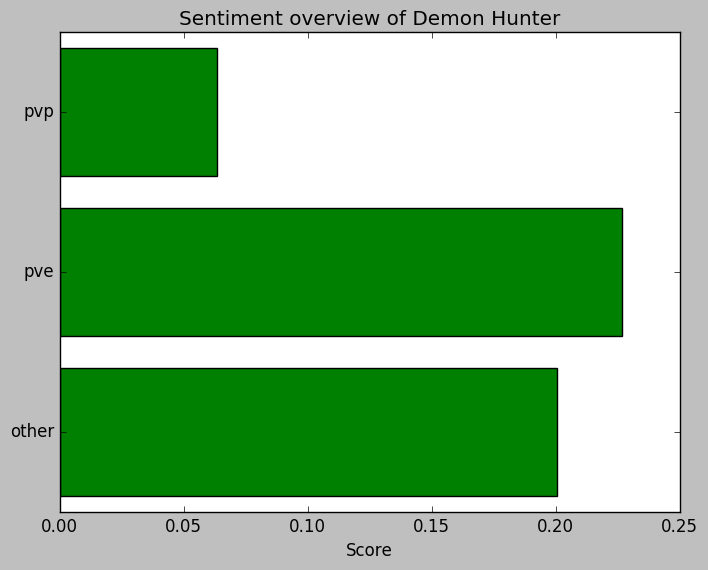

[('pvp', 0.1940320214521452), ('pve', 0.22939665845351648), ('other', 0.30155338507877666)]


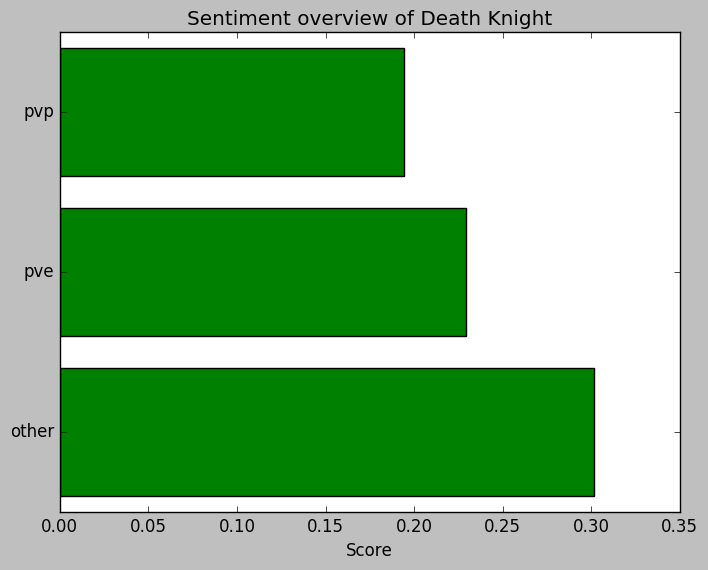

In [45]:
for wow_class, score_dict in scores_gt.items():
    bar_plot_gt_score(wow_class, score_dict)